In [2]:
#Adapted from DeepLabv3FineTuning

In [3]:
import torch
import matplotlib.pyplot as plt
import cv2
import pandas as pd

In [5]:
# Load the trained model 
model = torch.load('./GearsModelE5B4/weights.pt')
# Set the model to evaluate mode
model.eval()

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [7]:
# Read the log file using pandas into a dataframe
df = pd.read_csv('./GearsModelE5B4/log.csv')

### Training and testing loss, f1_score and auroc values for the model trained on the CrackForest dataset

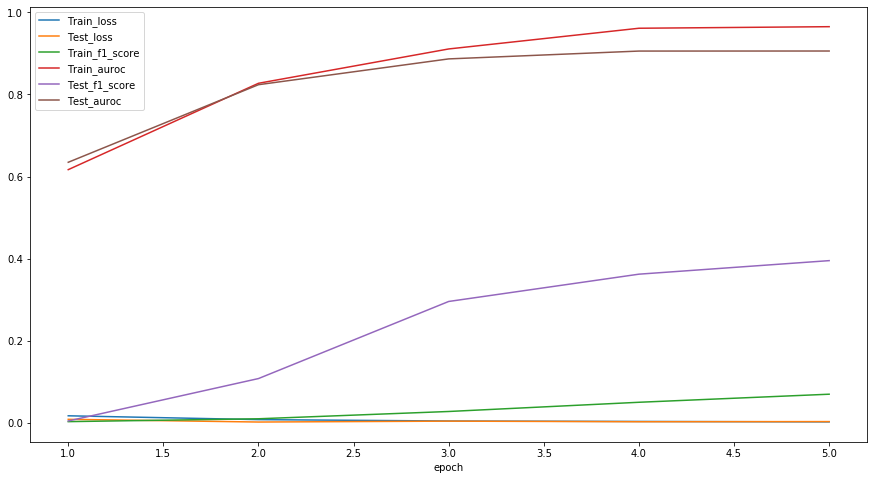

In [8]:
# Plot all the values with respect to the epochs
df.plot(x='epoch',figsize=(15,8));

In [9]:
print(df[['Train_auroc','Test_auroc']])

   Train_auroc  Test_auroc
0     0.616797    0.634757
1     0.827220    0.823766
2     0.910852    0.886627
3     0.961305    0.905707
4     0.965102    0.905825


In [10]:
print(df[['Train_f1_score','Test_f1_score']])

   Train_f1_score  Test_f1_score
0        0.002843       0.004467
1        0.009824       0.107809
2        0.027578       0.295637
3        0.050028       0.362124
4        0.069681       0.395112


In [11]:
print(df[['Train_loss','Test_loss']])

   Train_loss  Test_loss
0    0.017087   0.008519
1    0.007775   0.001888
2    0.004378   0.004072
3    0.003293   0.002621
4    0.002262   0.002987


### Sample Prediction

In [12]:
# Read  a sample image and mask from the data-set
img = cv2.imread(f'./Gear/Synthetic Images/2/normal/render_1.png').transpose(2,0,1).reshape(1,3,768,1024)
mask = cv2.imread(f'./Gear/Synthetic Images/2/mask/render_1.png')
with torch.no_grad():
    a = model(torch.from_numpy(img).type(torch.FloatTensor)/255)

(array([3.19500e+03, 9.81900e+03, 1.31610e+04, 2.04190e+04, 2.48072e+05,
        4.68204e+05, 1.83030e+04, 4.62300e+03, 5.57000e+02, 7.90000e+01]),
 array([-0.32679012, -0.26478627, -0.2027824 , -0.14077856, -0.0787747 ,
        -0.01677084,  0.04523302,  0.10723688,  0.16924073,  0.2312446 ,
         0.29324844], dtype=float32),
 <a list of 10 Patch objects>)

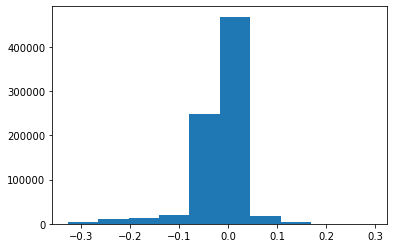

In [13]:
# Plot histogram of the prediction to find a suitable threshold. From the histogram a 0.1 looks like a good choice.
plt.hist(a['out'].data.cpu().numpy().flatten())

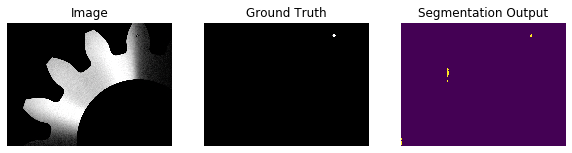

In [16]:
# Plot the input image, ground truth and the predicted output
plt.figure(figsize=(10,10));
plt.subplot(131);
plt.imshow(img[0,...].transpose(1,2,0));
plt.title('Image')
plt.axis('off');
plt.subplot(132);
plt.imshow(mask);
plt.title('Ground Truth')
plt.axis('off');
plt.subplot(133);
plt.imshow(a['out'].cpu().detach().numpy()[0][0]>0.15);
plt.title('Segmentation Output')
plt.axis('off');
#plt.savefig('./AnalysisOutput/SegmentationOutput.png',bbox_inches='tight')